Το αρχείο data.csv πρέπει να βρίσκεται μέσα στον ίδιο φάκελο με το πρόγραμμα για να μπορέσει να το διαβάσει

In [169]:
import winsound

file = open('data.csv', "r")

c = 0
x = 0
colA = []
colB = []
colC = []

colAC = []

for line in file:
    c = c + 1
    if(x == 0):
        x = 1
        continue
    splitLine = line.split(",")
    colA.append(float(splitLine[0]))
    colAC.append(float(splitLine[0]))
    colB.append(float(splitLine[1]))
    stringC = splitLine[2]
    stringC = stringC[0:-2]
    colC.append(float(stringC))
    
winsound.Beep(400, 2500)

Κανονικοποίηση των δεδομένων / μέγιστο της κάθε στήλης

In [170]:
import winsound

sumA = max(colA)
sumB = max(colB)
sumC = max(colC)

for i in range(len(colA)):
    colA[i] = colA[i]/sumA
    colB[i] = colB[i]/sumB
    colC[i] = colC[i]/sumC

winsound.Beep(400, 2500)

Άρα σχέση ανάμεσα σε Α και Β είναι Β = Α^2

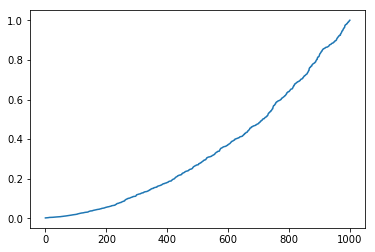

In [173]:
colA.sort()
import matplotlib.pyplot as plt
import math

for i in range(len(colA)):
    colA[i] = pow(colA[i], 2)
plt.plot(colA)
plt.show()

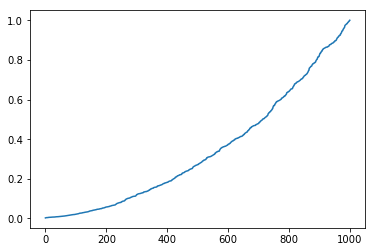

In [130]:
colB.sort()
import matplotlib.pyplot as plt
plt.plot(colB)
plt.show()

Θα φτιάξω ένα γράφημα για (στήληΑ^2,στήληΒ) και βλέπουμε ότι ταυτίζονται οι δύο γραφικές

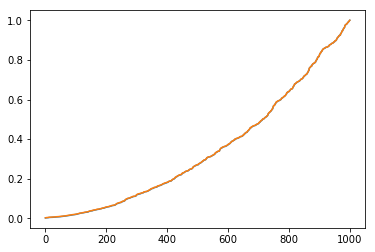

In [131]:
import matplotlib.pyplot as plt

tupleListAB = []
AB = []

for i in range(len(colA)):
    AB.append(colA[i]) #orange
    AB.append(colB[i]) #blue
    
    tupleListAB.append(tuple(AB))
    AB = []

plt.plot(tupleListAB)
plt.show()

MSE ανάμεσα σε στήλη Α και B

In [132]:
import math

error = 0

for i in range(len(colA)):
    error = error + pow(colA[i] - colB[i], 2)

error = error/len(colA)
print("ERROR:" + str(error))

ERROR:9.553926014086105e-07


Σχέση ανάμεσα σε Α και C

In [151]:
import math
import matplotlib.pyplot as plt

d = {}

def AC(colAC, v):
    copyAC = []
    errorAC = 0
    erv = []
    
    for i in range(len(colAC)):
        copyAC.append(colAC[i])
        
    for i in range(len(colAC)):
        copyAC[i] = math.exp(copyAC[i] + v)

    maxAC = max(copyAC)
    for i in range(len(colAC)):
        copyAC[i] = copyAC[i]/maxAC

    for i in range(len(colAC)):
        errorAC = errorAC + pow(copyAC[i] - colC[i], 2)
    
    errorAC = errorAC/len(colAC)
    
    erv.append(v)
    erv.append(errorAC)
    
    return(tuple(erv))

for v in range(0, 100):
    x = AC(colAC, v)
    if (not(x[0] in d)):
        d[x[0]] = x[1]

Ταξινόμηση λαξικού με βάση την τιμή error και θα πάρω το κλειδί της που είναι η τιμή v(φθίνουσα)
Συμπέρασμα: v = 56

In [155]:
import operator

sorted_error = sorted(d.items(), key=operator.itemgetter(1))
print(sorted_error[-1])

(56, 0.0019916702846461357)


Γράφημα στήλης Α: Α = e^(x) + 56

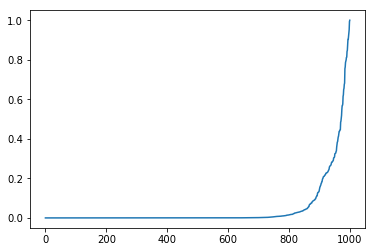

In [165]:
import math
import matplotlib.pyplot as plt

for i in range(len(colAC)):
    colAC[i] = math.exp(colAC[i] + 56)

maxAC = max(colAC)
for i in range(len(colAC)):
    colAC[i] = colAC[i]/maxAC

plt.plot(colAC)
plt.show()

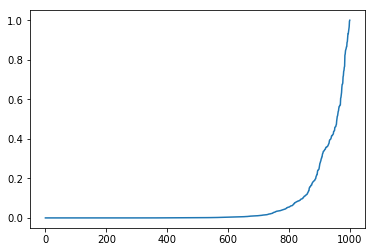

In [166]:
import matplotlib.pyplot as plt
plt.plot(colC)
plt.show()

Θα φτιάξω ένα γράφημα για (στήλη e^A + 56,στήληC) και βλέπουμε ότι ταυτίζονται οι δύο γραφικές

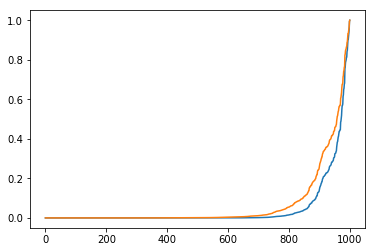

In [167]:
import matplotlib.pyplot as plt

tupleListAC = []
AC = []

for i in range(len(colAC)):
    AC.append(colAC[i]) #blue
    AC.append(colC[i]) #orange
    
    tupleListAC.append(tuple(AC))
    AC = []

plt.plot(tupleListAC)
plt.show()

MSE ανάμεσα σε στήλη Α και C

In [168]:
import math

errorAC = 0

for i in range(len(colAC)):
    errorAC = errorAC + pow(colAC[i] - colC[i], 2)

errorAC = errorAC/len(colAC)
print("ERROR:" + str(errorAC))

ERROR:0.0019916702846461357
